In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from datetime import datetime

In [47]:
v5 = pd.read_csv("Spare-it V5 scale records Jan 1 to Oct 16 2023-001.csv")
cds = pd.read_excel("fullness-assessments CCDS as of Oct 13 2023.xlsx")

# Spare-it V5 scale records

## Data exploration

In [48]:
v5.head()

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day
0,2023-01-02 12:41:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.017395,2023-01-02 12:41:00.000,NaN,2023,1,2
1,2023-01-02 13:02:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.101854,2023-01-02 13:02:00.000,NaN,2023,1,2
2,2023-01-02 13:53:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.169986,2023-01-02 13:53:00.000,NaN,2023,1,2
3,2023-01-02 16:30:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.559625,2023-01-02 16:30:00.000,NaN,2023,1,2
4,2023-01-02 16:39:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2594.186313,2023-01-02 16:39:00.000,NaN,2023,1,2


In [49]:
v5.shape

(26979124, 12)

In [50]:
v5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26979124 entries, 0 to 26979123
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   createdat   object 
 1   iotid       object 
 2   hide        bool   
 3   bin         object 
 4   errorcode   object 
 5   weight      float64
 6   battery     float64
 7   updatedat   object 
 8   weightdiff  float64
 9   year        int64  
 10  month       int64  
 11  day         int64  
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 2.2+ GB


In [51]:
v5.isna().sum()

createdat            0
iotid                0
hide                 0
bin                  0
errorcode            0
weight               0
battery              0
updatedat            0
weightdiff    26979124
year                 0
month                0
day                  0
dtype: int64

In [52]:
v5.describe()

,weight,battery,weightdiff,year,month,day
count,2.697912e+07,2.697912e+07,0.0,26979124.0,2.697912e+07,2.697912e+07
mean,3.965010e+03,2.891115e+03,NaN,2023.0,5.119058e+00,1.541971e+01
std,7.578254e+03,1.583904e+02,NaN,0.0,2.526648e+00,8.707518e+00
min,-1.000000e+05,1.334859e+03,NaN,2023.0,1.000000e+00,1.000000e+00
25%,7.644770e+02,2.860304e+03,NaN,2023.0,3.000000e+00,8.000000e+00
50%,2.128634e+03,2.917983e+03,NaN,2023.0,5.000000e+00,1.500000e+01
75%,4.618906e+03,2.974899e+03,NaN,2023.0,7.000000e+00,2.300000e+01
max,1.000000e+05,3.251240e+03,NaN,2023.0,1.000000e+01,3.100000e+01


In [53]:
createdat_count = np.unique(v5.createdat, return_counts=True)
createdat_count[1][:5]
# Each record has a different number of creation timestamps

array([24, 24, 14, 20, 18], dtype=int64)

In [54]:
v5.bin.value_counts().sort_values(ascending=True)

cc839327-7806-49cb-8fa6-19391570065a        20
fc67ba54-64df-47ac-bd15-019414ba2483       101
1595ad8a-7fbe-487f-88e1-f25001a0becd       102
578aa921-5dfb-4a95-a97e-a96b88b0ad4b       192
a68ab306-a1c9-467d-a1dd-f080e675b45c       231
                                         ...  
d76953e9-3f48-4900-8c12-1b85a777360f    271038
8c9ae9cf-89ba-4dc4-95a6-cacba215b27a    274660
e89c0fc0-e814-4bb7-884a-b8cc1345a4ce    377254
95171614-b019-4eb9-b726-0af6674a9451    445484
09b1ece7-5aaa-4c66-a89a-ac6a99bae6ed    468728
Name: bin, Length: 1188, dtype: int64

In [55]:
cols = ['iotid','bin']
v5.groupby(cols).size()
# the number of records for each bin is different
# iotid and bin do not have a one-to-one correspondence.

iotid        bin                                 
lora-000014  65fdffd5-af50-4157-adfa-582251a1b27d    19136
lora-000015  4f56d445-de55-4578-86bc-9a61bceb2c7a    21459
lora-000017  d08c0976-ceb0-4bf3-8d54-23e21eb5e28a    19087
lora-000051  e8324a97-0523-44aa-a4a4-3e9aae344d24    44400
lora-000052  9513caf9-ea3a-4486-8e94-59ce2094c73c    21360
                                                     ...  
lora-001802  bca1fba1-5d12-484d-a1e6-fe8cad3027ab     1143
lora-001803  12a5e0fa-e9f2-4978-aba8-757f66ae5e5a     5416
lora-001815  2cfd5943-277e-4d6f-a172-c304d990c2d8     1130
             f0812a21-ab64-4f8e-9cda-3b7bd81b0dc5    12052
lora-001825  e9d32794-2a58-4321-8acd-1788b9ed704e      541
Length: 1326, dtype: int64

In [56]:
np.unique(v5.hide, return_counts=True)

(array([False,  True]), array([26765177,   213947], dtype=int64))

In [57]:
np.unique(v5.errorcode, return_counts=True)

(array(['NO_ERROR', 'OUT_OF_RANGE', 'UNSTABLE'], dtype=object),
 array([26763900,   201405,    13819], dtype=int64))

In [58]:
createdat_ifequal_updatedat = [(v5.createdat[i] == v5.updatedat[i]) for i in range(v5.shape[0])]
np.unique(createdat_ifequal_updatedat, return_counts=True)
#createdat and updatedat do not have a one-to-one correspondence

(array([False,  True]), array([   19973, 26959151], dtype=int64))

## Data cleaning

In [59]:
v5['createdat_ns'] = pd.to_datetime(v5["createdat"])

In [60]:
v5['updatedat_ns'] = pd.to_datetime(v5["updatedat"])

In [61]:
v5.head()

,createdat,iotid,hide,bin,errorcode,weight,battery,updatedat,weightdiff,year,month,day,createdat_ns,updatedat_ns
0,2023-01-02 12:41:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.017395,2023-01-02 12:41:00.000,NaN,2023,1,2,2023-01-02 12:41:00,2023-01-02 12:41:00
1,2023-01-02 13:02:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.101854,2023-01-02 13:02:00.000,NaN,2023,1,2,2023-01-02 13:02:00,2023-01-02 13:02:00
2,2023-01-02 13:53:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2596.169986,2023-01-02 13:53:00.000,NaN,2023,1,2,2023-01-02 13:53:00,2023-01-02 13:53:00
3,2023-01-02 16:30:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2595.559625,2023-01-02 16:30:00.000,NaN,2023,1,2,2023-01-02 16:30:00,2023-01-02 16:30:00
4,2023-01-02 16:39:00.000,lora-000060,False,95171614-b019-4eb9-b726-0af6674a9451,NO_ERROR,14100.862135,2594.186313,2023-01-02 16:39:00.000,NaN,2023,1,2,2023-01-02 16:39:00,2023-01-02 16:39:00


In [62]:
v5 = v5.groupby(by='bin').apply(lambda x: x.sort_values(["createdat_ns"],ascending= True))

In [63]:
v5.drop(['createdat','weightdiff','year','month','day'], axis=1, inplace=True)

In [64]:
v5.drop(v5[v5.hide].index, axis=0, inplace=True)

In [65]:
v5.head()

iotid   hide  \
bin                                                                 
002a3bdd-18b3-459f-9377-483249ccf9b6 26291373  lora-001784  False   
                                     25754646  lora-001784  False   
                                     20770982  lora-001784  False   
                                     25514982  lora-001784  False   
                                     24540657  lora-001784  False   

                                                                                bin  \
bin                                                                                   
002a3bdd-18b3-459f-9377-483249ccf9b6 26291373  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     25754646  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     20770982  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     25514982  002a3bdd-18b3-459f-9377-483249ccf9b6   
                                     24540657  002a3bdd-18b3-459f-9377-483249ccf9b6   

                                              errorcode       weight  \
bin                                                                    
002a3bdd-18b3-459f-9377-483249ccf9b6 26291373  NO_ERROR  4588.387884   
                                     25754646  NO_ERROR  4588.387884   
                                     20770982  NO_ERROR  4585.336080   
                                     25514982  NO_ERROR  4588.387884   
                                     24540657  NO_ERROR  4585.336080   

                                                   battery  \
bin                                                          
002a3bdd-18b3-459f-9377-483249ccf9b6 26291373  2948.348211   
                                     25754646  2949.874113   
                                     20770982  2947.737850   
                                     25514982  2957.808804   
                                     24540657  2941.023880   

                                                             updatedat  \
bin                                                                      
002a3bdd-18b3-459f-9377-483249ccf9b6 26291373  2023-09-22 17:02:00.000   
                                     25754646  2023-09-22 17:08:00.000   
                                     20770982  2023-09-22 17:13:00.000   
                                     25514982  2023-09-22 17:18:00.000   
                                     24540657  2023-09-22 17:23:00.000   

                                                     createdat_ns  \
bin                                                                 
002a3bdd-18b3-459f-9377-483249ccf9b6 26291373 2023-09-22 17:02:00   
                                     25754646 2023-09-22 17:08:00   
                                     20770982 2023-09-22 17:13:00   
                                     25514982 2023-09-22 17:18:00   
                                     24540657 2023-09-22 17:23:00   

                                                     updatedat_ns  
bin                                                                
002a3bdd-18b3-459f-9377-483249ccf9b6 26291373 2023-09-22 17:02:00  
                                     25754646 2023-09-22 17:08:00  
                                     20770982 2023-09-22 17:13:00  
                                     25514982 2023-09-22 17:18:00  
                                     24540657 2023-09-22 17:23:00

In [66]:
v5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26765177 entries, ('002a3bdd-18b3-459f-9377-483249ccf9b6', 26291373) to ('fff3a4d9-8506-48f4-8387-bfb1890450e9', 25938388)
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   iotid         object        
 1   hide          bool          
 2   bin           object        
 3   errorcode     object        
 4   weight        float64       
 5   battery       float64       
 6   updatedat     object        
 7   createdat_ns  datetime64[ns]
 8   updatedat_ns  datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(2), object(4)
memory usage: 3.0+ GB


## Analyzing bin 002a3bdd-18b3-459f-9377-483249ccf9b6

In [70]:
v5.bin.value_counts()["002a3bdd-18b3-459f-9377-483249ccf9b6"]

1137

In [72]:
v5[:1137].to_csv("try.csv")

In [77]:
v5_bin1 = v5[:1137]

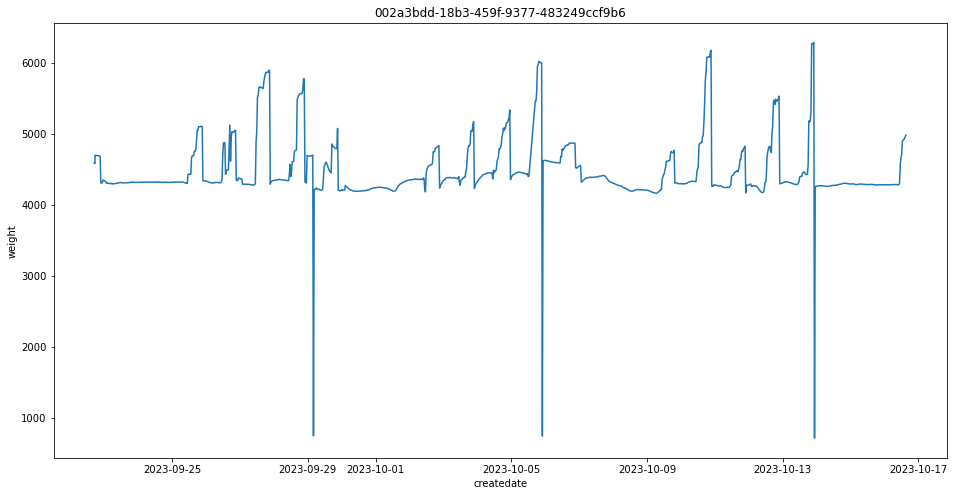

In [78]:
plt.figure(figsize=(16,8))
plt.plot(v5_bin1.createdat_ns, v5_bin1.weight)
plt.xlabel('createdate')
plt.title('002a3bdd-18b3-459f-9377-483249ccf9b6')
plt.ylabel('weight')
plt.show()

In [79]:
np.unique(v5_bin1.errorcode, return_counts=True)

(array(['NO_ERROR'], dtype=object), array([1137], dtype=int64))

Q: What's the meaning of errorcode? 

Q: How did you determine the value of errorcode? OUT_OF_RANGE doesn't mean Downward Spikes.

Q: Do we need to drop OUT_OF_RANGE and INSTABLE?

Q: Why weightdiff is deprecated?

# My plan

1. Discuss what can cause irregularities(spikes, baseline shift, other anomalies)

like trash bin position change, someone pressing, scale itself malfunctioning, foreign objects on scale, network anomalies, battery effects, cleaning up trash, etc.

2. Distinguish between irregularities and noises

Q: Can we use the variable of weightdiff and time interval?

Q: How was the scope determined?

3. identify problematic scales (noise to signal ratio)

4. analyzing the impact between variables

like battery and scale

5. categorize irregularities

Q:If we can categorize irregularities by clustering?

Q: In what way can we decide a range of possible weights for a bin?

Q: How to find Baseline. Weight after emptying trash cans?

I need to learn more about Auto-Regressive (AR) Models and Rolling Averages

6. Correlate the causes of irregularities with their categories

7. Correct categorized irregularities